<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#optimisation-tf_idf-avec-ARI" data-toc-modified-id="optimisation-tf_idf-avec-ARI-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>optimisation tf_idf avec ARI</a></span></li><li><span><a href="#images" data-toc-modified-id="images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>images</a></span></li><li><span><a href="#Transfert-Learning" data-toc-modified-id="Transfert-Learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transfert Learning</a></span></li></ul></div>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
import ast
import nltk
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
%matplotlib inline

In [2]:
data = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [3]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [5]:
len(data.product_category_tree.unique())

642

In [6]:
data = data.applymap(lambda x: x.lower() if type(x) == str else x)

In [7]:
data.description[0]

'key features of elegance polyester multicolor abstract eyelet door curtain floral curtain,elegance polyester multicolor abstract eyelet door curtain (213 cm in height, pack of 2) price: rs. 899 this curtain enhances the look of the interiors.this curtain is made from 100% high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this curtain is ant- wrinkle and anti shrinkage and have elegant apparance.give your home a bright and modernistic appeal with these designs. the surreal attention is sure to steal hearts. these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. bring home the elegant curtain that softly filters light in your room so that you

In [8]:
reg_tokenizer = nltk.RegexpTokenizer(r'\w+')

In [9]:
from nltk.corpus import stopwords

In [10]:
stops = stopwords.words('english')

In [11]:
data['description_bow'] = data.description.apply(
    lambda x: [word for word in reg_tokenizer.tokenize(x) if word not in stops])

In [12]:
# https://towardsdatascience.com/stemming-corpus-with-nltk-7a6a6d02d3e5 -> snowball
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer

wnl = WordNetLemmatizer()
stemmer = EnglishStemmer()

# colonne de liste de tokens
# pour chaque ligne -> prendre la liste de tokens et appliquer le stem/wnl sur les mots et renvoyer une liste de mot stemmed

data['description_bow_lem'] = data.description_bow.apply(
    lambda x: [wnl.lemmatize(word) for word in x])
data['description_bow_stem'] = data.description_bow.apply(
    lambda x: [stemmer.stem(word) for word in x])

In [13]:
data.description_bow_lem[0]

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'cm',
 'height',
 'pack',
 '2',
 'price',
 'r',
 '899',
 'curtain',
 'enhances',
 'look',
 'interior',
 'curtain',
 'made',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'romantic',
 'loving',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'design',
 'surreal',
 'attention',
 'sure',
 'steal',
 'heart',
 'contemporary',
 'eyelet',
 'valance',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',
 'create',
 'spec

In [14]:
corpus_description = data.description.values.tolist()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [16]:
def tokenizer_lemm(text):

    # transformer en tokens si pas stopword + lemmatization
    
    tokens = [w for w in reg_tokenizer.tokenize(text) if w not in stops]

    tokens_transformed = [wnl.lemmatize(word) for word in tokens]

    return tokens_transformed

In [17]:
def tokenizer_stem(text):
    
    # transformer en tokens si pas stopword + stemming

    tokens = [w for w in reg_tokenizer.tokenize(text) if w not in stops]

    tokens_transformed = [stemmer.stem(word) for word in tokens]

    return tokens_transformed

In [18]:
count_test = CountVectorizer(tokenizer=reg_tokenizer.tokenize, stop_words=stops)
X = count_test.fit_transform([data.description[0]])

pd.DataFrame(X.todense(), columns=count_test.get_feature_names())

,100,2,213,899,abstract,amount,ant,anti,apart,apparance,...,surreal,thing,type,valance,want,welcome,whole,wish,world,wrinkle
0,1,5,3,1,4,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [19]:
counter = CountVectorizer(tokenizer=reg_tokenizer.tokenize)
counter_stop = CountVectorizer(tokenizer=reg_tokenizer.tokenize, stop_words=stops)
counter_stem = CountVectorizer(tokenizer=tokenizer_stem)
counter_lemm = CountVectorizer(tokenizer=tokenizer_lemm)

vectorizer_stem = TfidfVectorizer(tokenizer=tokenizer_stem,
                                  max_df=0.95, min_df=2) # max_df 1/7 (7categ) pour voir (optimisation plus tard)?
vectorizer_lemm = TfidfVectorizer(tokenizer=tokenizer_lemm,
                                  max_df=0.95, min_df=2)

In [20]:
def vect_df(vect_func):
    
    X = vect_func.fit_transform(corpus_description)
    dense = X.todense()
    
    return pd.DataFrame(dense, columns=vect_func.get_feature_names())

In [21]:
count = vect_df(counter)
count_stop = vect_df(counter_stop)
count_stem = vect_df(counter_stem)
count_lemm = vect_df(counter_lemm)

tf_idf_stem = vect_df(vectorizer_stem)
tf_idf_lemm = vect_df(vectorizer_lemm)

In [22]:
tsne = TSNE(init='pca', n_iter=2000) # local, sens d'un mot
pca = PCA(n_components=0.8, svd_solver='full') # trop de features, les deux premiers axes expliquent trop peu de variance

In [23]:
pca.fit(tf_idf_stem)

PCA(n_components=0.8, svd_solver='full')

In [24]:
np.cumsum(pca.explained_variance_ratio_) # 8% de variance selon les 2axes principaux

array([0.05263582, 0.08535768, 0.11114976, 0.13043829, 0.14593755,
       0.16040778, 0.17385088, 0.18554464, 0.19652599, 0.20674114,
       0.2155337 , 0.22429713, 0.23265671, 0.24058155, 0.24839823,
       0.2560505 , 0.26335172, 0.27042039, 0.27725749, 0.28389789,
       0.29045544, 0.2967467 , 0.30289593, 0.30900183, 0.31496367,
       0.32086013, 0.32650981, 0.33204662, 0.33734431, 0.34235679,
       0.34718974, 0.3519571 , 0.35664021, 0.3612795 , 0.36572942,
       0.37013317, 0.37439039, 0.37857724, 0.38267872, 0.38672615,
       0.39069498, 0.39457582, 0.39839892, 0.4022198 , 0.40590881,
       0.40954867, 0.41312239, 0.41667388, 0.42017783, 0.42362386,
       0.42697665, 0.43027202, 0.43349661, 0.43669728, 0.43987264,
       0.44302353, 0.44610479, 0.44915879, 0.45219266, 0.45521456,
       0.45817814, 0.46112395, 0.46400847, 0.46686874, 0.46970156,
       0.47250748, 0.47528047, 0.4780079 , 0.4807005 , 0.48338135,
       0.48603349, 0.48866626, 0.49128169, 0.49386969, 0.49644

In [25]:
def df_convert(arr, col=['axe1', 'axe2']):
    
    return pd.DataFrame(arr, columns=col)

In [26]:
def reduction(transf, df):
        
    tf = transf.fit_transform(df)
    
    if transf == pca:
        colonnes = ['PC{}'.format(i+1) for i in range(tf.shape[1])]
        return df_convert(tf, colonnes_tf)
    else:
        return df_convert(tf)

In [27]:
tsne_tf_stem = reduction(tsne, tf_idf_stem)
tsne_tf_lemm = reduction(tsne, tf_idf_lemm)
tsne_count_stem = reduction(tsne, count_stem)
tsne_count_lemm = reduction(tsne, count_lemm)
tsne_count_stop = reduction(tsne, count_stop)
tsne_count = reduction(tsne, count)

In [28]:
tf_idf_stem

,0,001,005,01,03,04,05tg,06,085,099,...,yes,yet,york,young,youth,yuva,zero,zipper,zone,zyxel
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.074297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.162622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data.product_category_tree.apply(lambda x: x.split('>>'))[0]

['["home furnishing ',
 ' curtains & accessories ',
 ' curtains ',
 ' elegance polyester multicolor abstract eyelet do..."]']

In [30]:
data.product_category_tree.apply(lambda x: len(x.split('>>'))).unique()

array([4, 5, 3, 7, 6, 2], dtype=int64)

In [31]:
data.product_category_tree.apply(lambda x: len(x.split('>>'))).value_counts()

3    368
5    278
4    274
6     70
7     57
2      3
Name: product_category_tree, dtype: int64

In [32]:
data['categories_split'] = data.product_category_tree.apply(lambda x: x.split('>>'))

for i in range(7):
    
    data['categ_{}'.format(i)] = data['categories_split'].apply(lambda x: " ".join(re.sub(r'[^a-zA-Z &]', '', x[i]).split()) if len(x)>i else np.nan)
    
# création de colonne par 'niveau' de categories 

In [33]:
for i in range(7):
    print('nombre d\'elements uniques dans categ_{}'.format(i), len(data['categ_{}'.format(i)].unique()))

nombre d'elements uniques dans categ_0 7
nombre d'elements uniques dans categ_1 62
nombre d'elements uniques dans categ_2 240
nombre d'elements uniques dans categ_3 345
nombre d'elements uniques dans categ_4 290
nombre d'elements uniques dans categ_5 117
nombre d'elements uniques dans categ_6 58


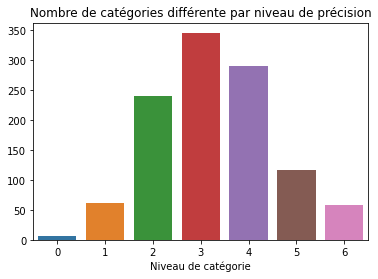

In [34]:
sns.barplot(x=np.arange(7), y= [len(data['categ_{}'.format(i)].unique()) for i in np.arange(7)])
plt.xlabel('Niveau de catégorie')
plt.title('Nombre de catégories différente par niveau de précision')
plt.show()

In [35]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,description_bow_lem,description_bow_stem,categories_split,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,categ_6
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,elegance polyester multicolor abstract eyelet ...,"[""home furnishing >> curtains & accessories >>...",crneg7bkmffyhq8z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,"[key, feature, elegance, polyester, multicolor...","[key, featur, eleg, polyest, multicolor, abstr...","[[""home furnishing , curtains & accessories ,...",home furnishing,curtains & accessories,curtains,elegance polyester multicolor abstract eyelet do,NaN,NaN,NaN
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,sathiyas cotton bath towel,"[""baby care >> baby bath & skin >> baby bath t...",btwegfzhgbxphzuh,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,"[specification, sathiyas, cotton, bath, towel,...","[specif, sathiya, cotton, bath, towel, 3, bath...","[[""baby care , baby bath & skin , baby bath ...",baby care,baby bath & skin,baby bath towels,sathiyas baby bath towels,sathiyas cotton bath towel bath towel red y,NaN,NaN
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,eurospa cotton terry face towel set,"[""baby care >> baby bath & skin >> baby bath t...",btweg6shxtdb2a2y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,"[key, feature, eurospa, cotton, terry, face, t...","[key, featur, eurospa, cotton, terri, face, to...","[[""baby care , baby bath & skin , baby bath ...",baby care,baby bath & skin,baby bath towels,eurospa baby bath towels,eurospa cotton terry face towel set piece fa,NaN,NaN
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,santosh royal fashion cotton printed king size...,"[""home furnishing >> bed linen >> bedsheets >>...",bdsejt9uqwhdubh4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,...,"[key, feature, santosh, royal, fashion, cotton...","[key, featur, santosh, royal, fashion, cotton,...","[[""home furnishing , bed linen , bedsheets ,...",home furnishing,bed linen,bedsheets,santosh royal fashion bedsheets,santosh royal fashion cotton printed king sized,NaN,NaN
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,jaipur print cotton floral king sized double b...,"[""home furnishing >> bed linen >> bedsheets >>...",bdsejthngwvgwwqu,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,...,"[key, feature, jaipur, print, cotton, floral, ...","[key, featur, jaipur, print, cotton, floral, k...","[[""home furnishing , bed linen , bedsheets ,...",home furnishing,bed linen,bedsheets,jaipur print bedsheets,jaipur print cotton floral king sized double bed,NaN,NaN


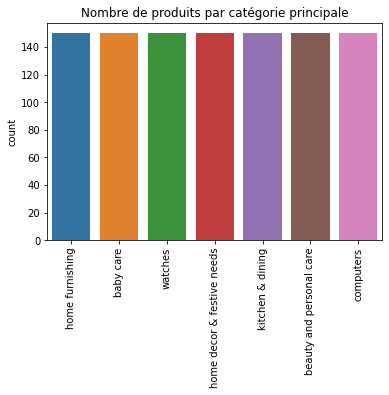

In [36]:
ax = sns.countplot(data=data, x='categ_0')
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Nombre de produits par catégorie principale')
plt.show()

In [37]:
def add_categ(df):
    
    df['categ'] = data.categ_0
    
    pass

In [38]:
liste = [tsne_tf_stem, tsne_tf_lemm, tsne_count_stem, tsne_count_lemm, tsne_count_stop, tsne_count]

In [39]:
for df in liste:
    
    add_categ(df)

In [40]:
def plot_reduc(df, donnees, reduction):
    
    #afficher resultat tsne du df avec true categories
    
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=df, x='axe1', y='axe2', hue='categ')
    plt.title('Représentation {} apres {}'.format(donnees, reduction))
    plt.show()
    
    pass

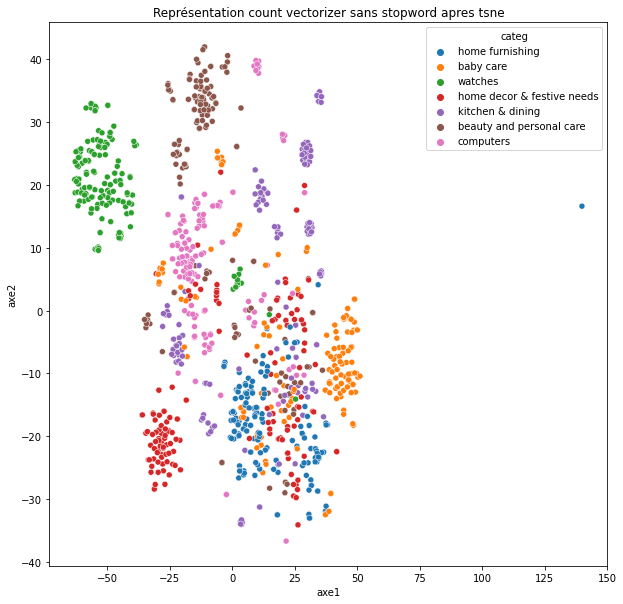

In [41]:
plot_reduc(tsne_count, 'count vectorizer sans stopword', 'tsne')

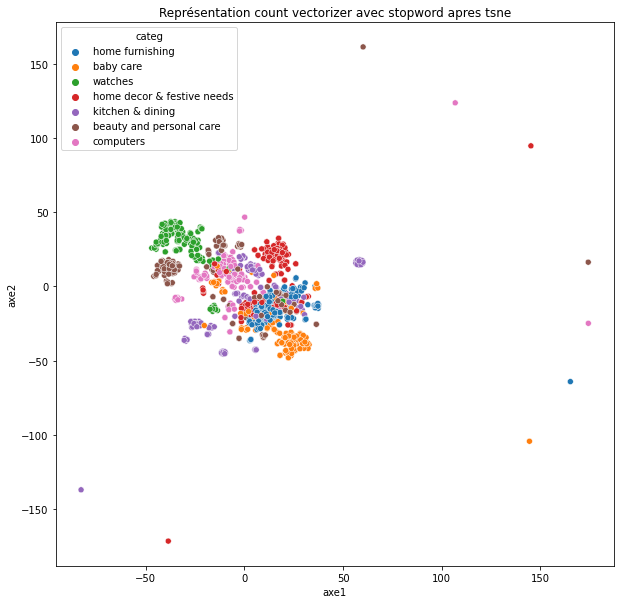

In [42]:
plot_reduc(tsne_count_stop, 'count vectorizer avec stopword', 'tsne')

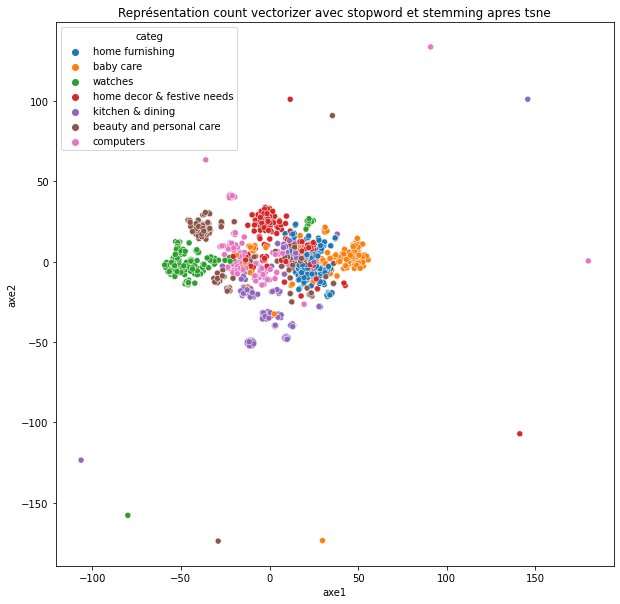

In [43]:
plot_reduc(tsne_count_stem, 'count vectorizer avec stopword et stemming', 'tsne')

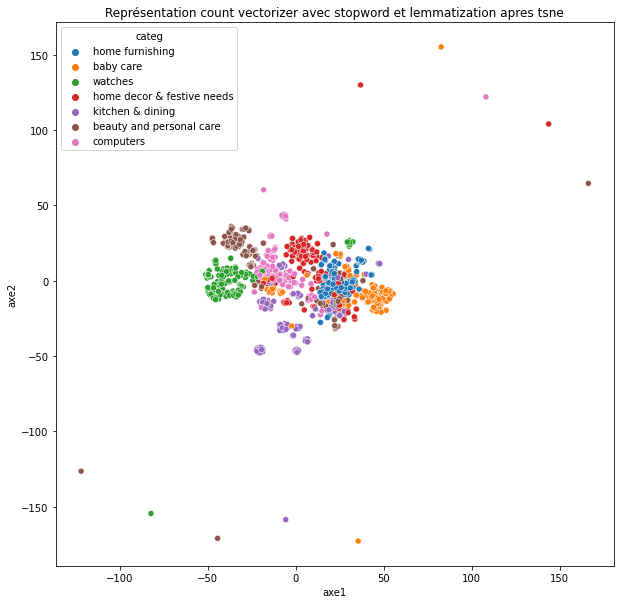

In [44]:
plot_reduc(tsne_count_lemm, 'count vectorizer avec stopword et lemmatization', 'tsne')

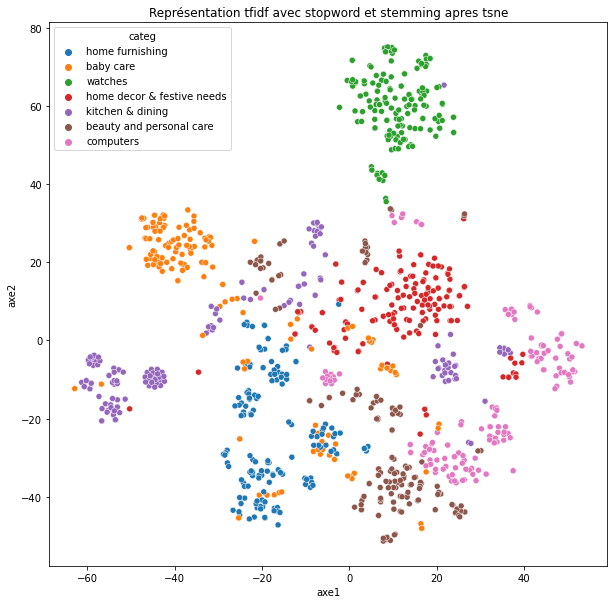

In [45]:
plot_reduc(tsne_tf_stem, 'tfidf avec stopword et stemming', 'tsne')

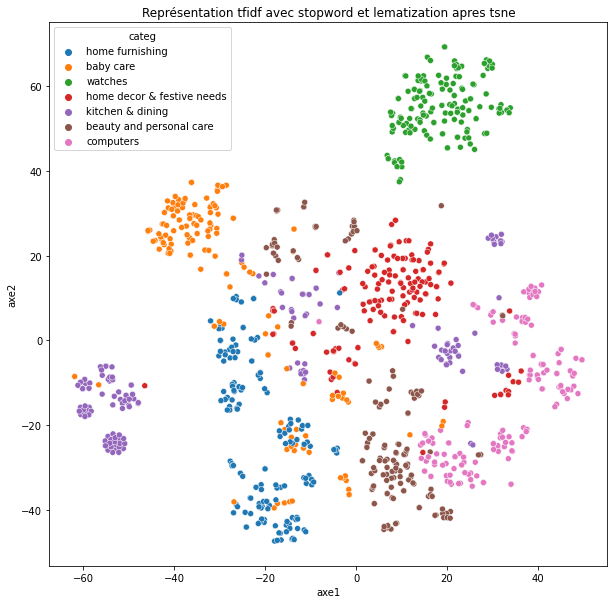

In [46]:
plot_reduc(tsne_tf_lemm, 'tfidf avec stopword et lematization', 'tsne')

In [47]:
# il y a des produits avec juste 2 niveaux de categories on va se limiter a ces deux niveaux (sans avoir optimisé max_df avec ari)

X_train, X_test, y_train, y_test = train_test_split(corpus_description, data[['categ_0', 'categ_1']])

X_train_stem = vectorizer_stem.fit_transform(X_train)
X_test_stem = vectorizer_stem.transform(X_test)
X_train_lemm = vectorizer_lemm.fit_transform(X_train)
X_test_lemm = vectorizer_lemm.transform(X_test)

cls_stem = MultiOutputClassifier(KNeighborsClassifier())
cls_lemm = MultiOutputClassifier(KNeighborsClassifier())
cls_stem.fit(X_train_stem, y_train)
cls_lemm.fit(X_train_lemm, y_train)

cls_stem.score(X_test_stem, y_test)

0.8174904942965779

In [48]:
cls_lemm.score(X_test_lemm, y_test)

0.8060836501901141

# optimisation tf_idf avec ARI

In [49]:
max_df = np.arange(0.2, 1, 0.1)
min_df = np.arange(10, 151, 10)
perplex = np.arange(10, 51, 10)
lr = np.arange(200, 1001, 100)

In [50]:
min_df = np.append(min_df, 2)

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
clus = KMeans(n_clusters=7, random_state=42) # 1 cluster par categ

In [99]:
params = []
ari = []

#gridsearch 'à la main', optimisation sur valeur ARI

for i in max_df:
    
    for j in min_df:
    
        vecto = TfidfVectorizer(tokenizer=tokenizer_stem,
                                      max_df=i, min_df=j)
        vecto = vect_df(vecto)

        for perp in perplex:

            for lrate in lr:

                par = ({'max_df': i, 'min_df': j, 'perplexity': perp, 'learning_rate':lrate})
                params.append(par)

                tsne_loop = TSNE(init='pca', n_iter=2000, perplexity=perp,
                                 learning_rate=lrate)
                tf_reduc = reduction(tsne_loop, vecto)

                clus.fit(tf_reduc)

                ars = adjusted_rand_score(clus.labels_, data.categ_0)

                ari.append(ars)

In [100]:
max(ari)

0.6417020279828621

In [101]:
params[ari.index(max(ari))]

{'max_df': 0.30000000000000004,
 'min_df': 2,
 'perplexity': 20,
 'learning_rate': 600}

In [52]:
vectorizer_stem = TfidfVectorizer(tokenizer=tokenizer_stem,
                                  max_df=0.3, min_df=2)

In [53]:
tf_idf_stem = vect_df(vectorizer_stem)

In [54]:
tsne = TSNE(init='pca', n_iter=2000, perplexity=20, learning_rate=600)

In [55]:
tsne_tf_stem = reduction(tsne, tf_idf_stem)

In [56]:
add_categ(tsne_tf_stem)

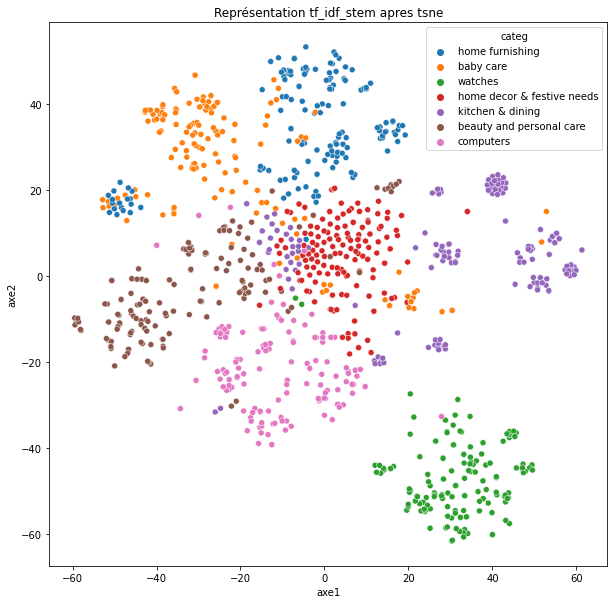

In [57]:
plot_reduc(tsne_tf_stem, 'tf_idf_stem', 'tsne')

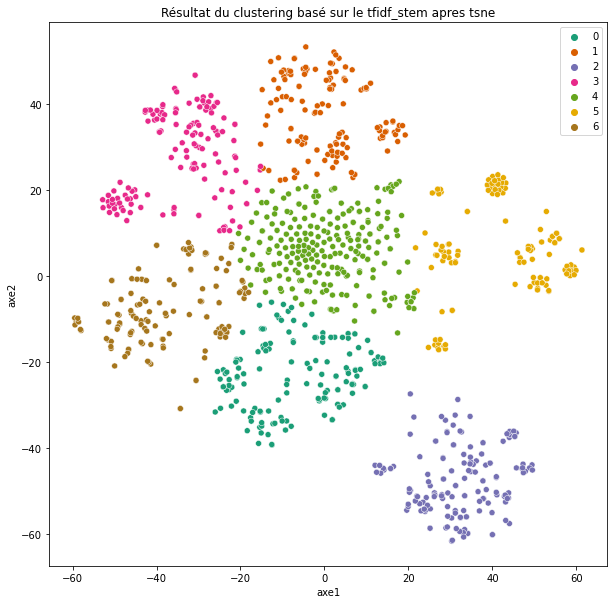

In [129]:
#affichage du clustering KMeans apres tsne

clus.fit(tsne_tf_stem.drop('categ', axis=1))

plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_tf_stem['axe1'], y=tsne_tf_stem['axe2'], hue=clus.labels_, palette='Dark2')
plt.title('Résultat du clustering basé sur le tfidf_stem apres tsne')
plt.show()

In [58]:
#classification apres optimisation

X_train, X_test, y_train, y_test = train_test_split(corpus_description, data['categ_0'])

X_train_stem = vectorizer_stem.fit_transform(X_train)
X_test_stem = vectorizer_stem.transform(X_test)

cls_stem = KNeighborsClassifier()
cls_stem.fit(X_train_stem, y_train)

cls_stem.score(X_test_stem, y_test)

0.8403041825095057

In [59]:
X_train, X_test, y_train, y_test = train_test_split(corpus_description, data[['categ_0', 'categ_1']])

X_train_stem = vectorizer_stem.fit_transform(X_train)
X_test_stem = vectorizer_stem.transform(X_test)


cls_stem = MultiOutputClassifier(KNeighborsClassifier())
cls_stem.fit(X_train_stem, y_train)

cls_stem.score(X_test_stem, y_test)

#perte de précision par rapport à classification précédente non optimisée par ARI

0.6996197718631179

In [60]:
# meilleur sur 7 catégories puisqu'on a optimisé sur 7 clusters
# on a toujour sune bonne précision sur un algorithme sans optimisation sur celui ci
# optimisation sur clustering donc points cat A milieu cluster B moins bien classifiés d'où perte precision
# mais etude faisabilité le but n'est pas de faire/optimiser classification à ce moment

In [61]:
for df in [tf_idf_stem, count_stem]:
    add_categ(df)

In [62]:
def top_20(df, cat, typ):
    
    #affichage du top 20 des termes qui ressortent
    
    if typ == 'count':
        df_group = df.groupby('categ').sum()
        titre = 'Top 20 des termes les plus utilisés dans la catégorie ' + cat
    else:
        df_group = df.groupby('categ').mean()
        titre = 'Top 20 des termes les plus spécifiques à la catégorie ' + cat
    
    top = df_group.loc[cat].sort_values(ascending=False)[:20]
    
    sns.barplot(x=top.index, y=top.values)
    plt.xticks(rotation=90)
    
    plt.title(titre)

In [63]:
def top(df, typ):
    
    #boucle sur les categories pour avoir le top 20 de chacune

    fig = plt.figure(figsize=(25,20))

    for i,j in enumerate(data.categ_0.unique()):
    
        fig.add_subplot(3,3,i+1)
        top_20(df, j, typ)
        plt.subplots_adjust(hspace=0.25)

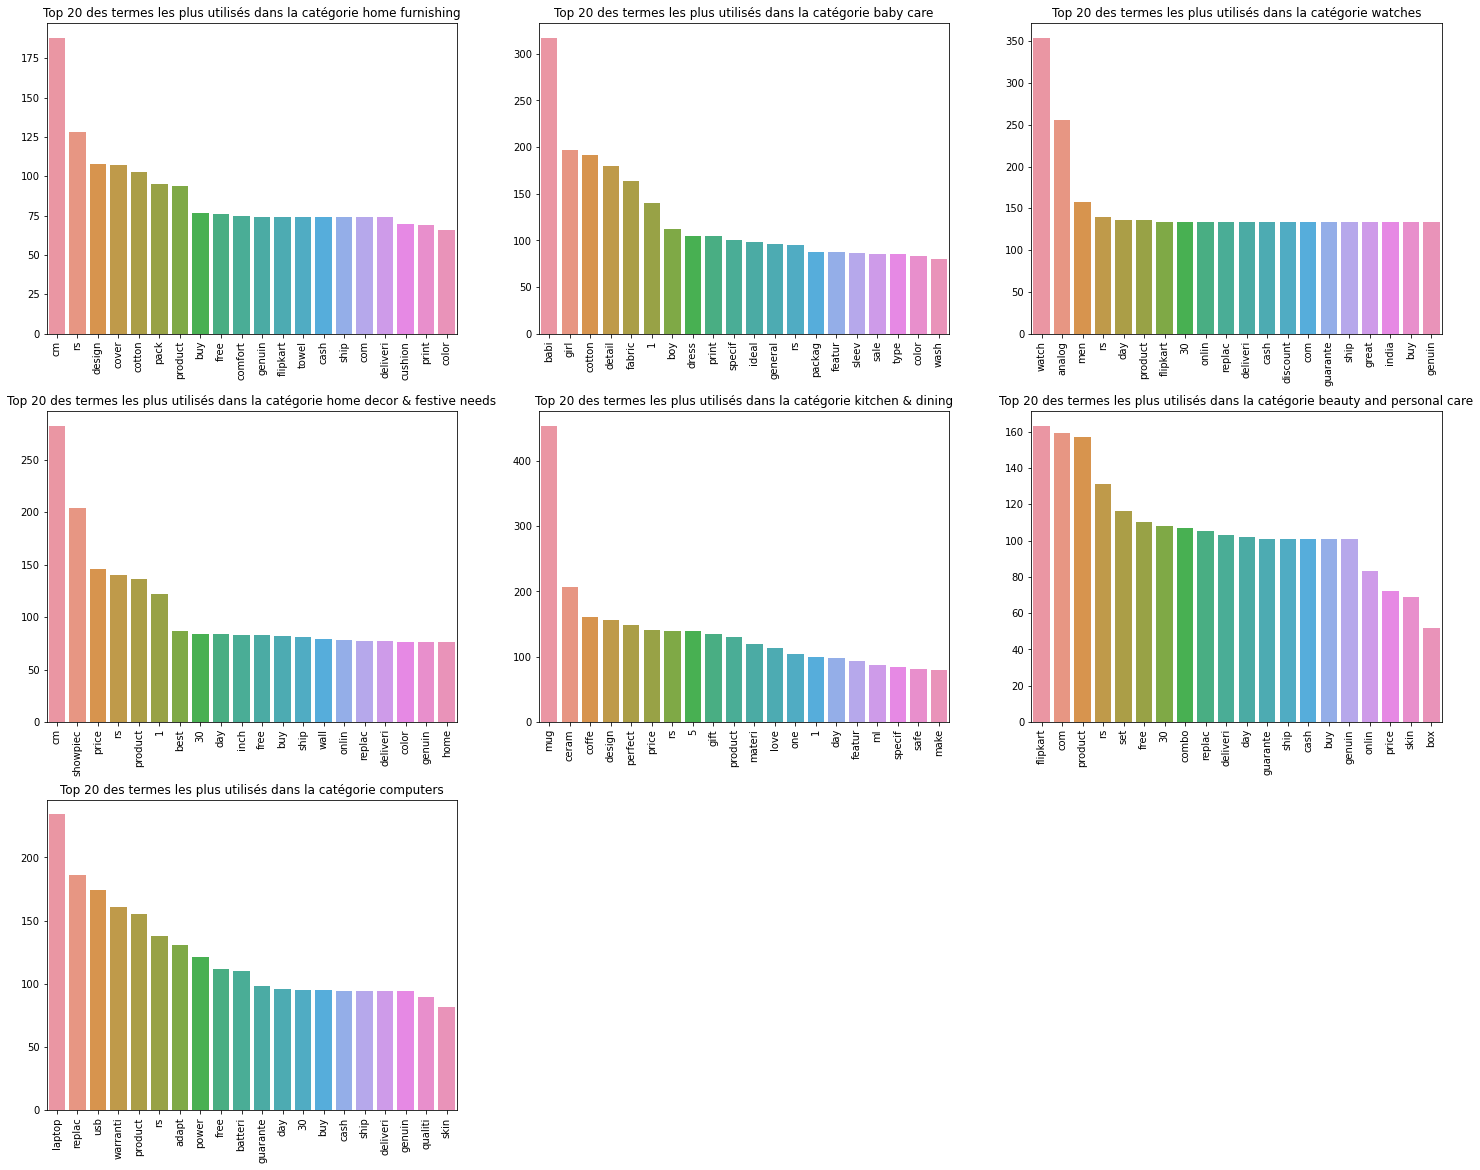

In [64]:
top(count_stem, 'count')

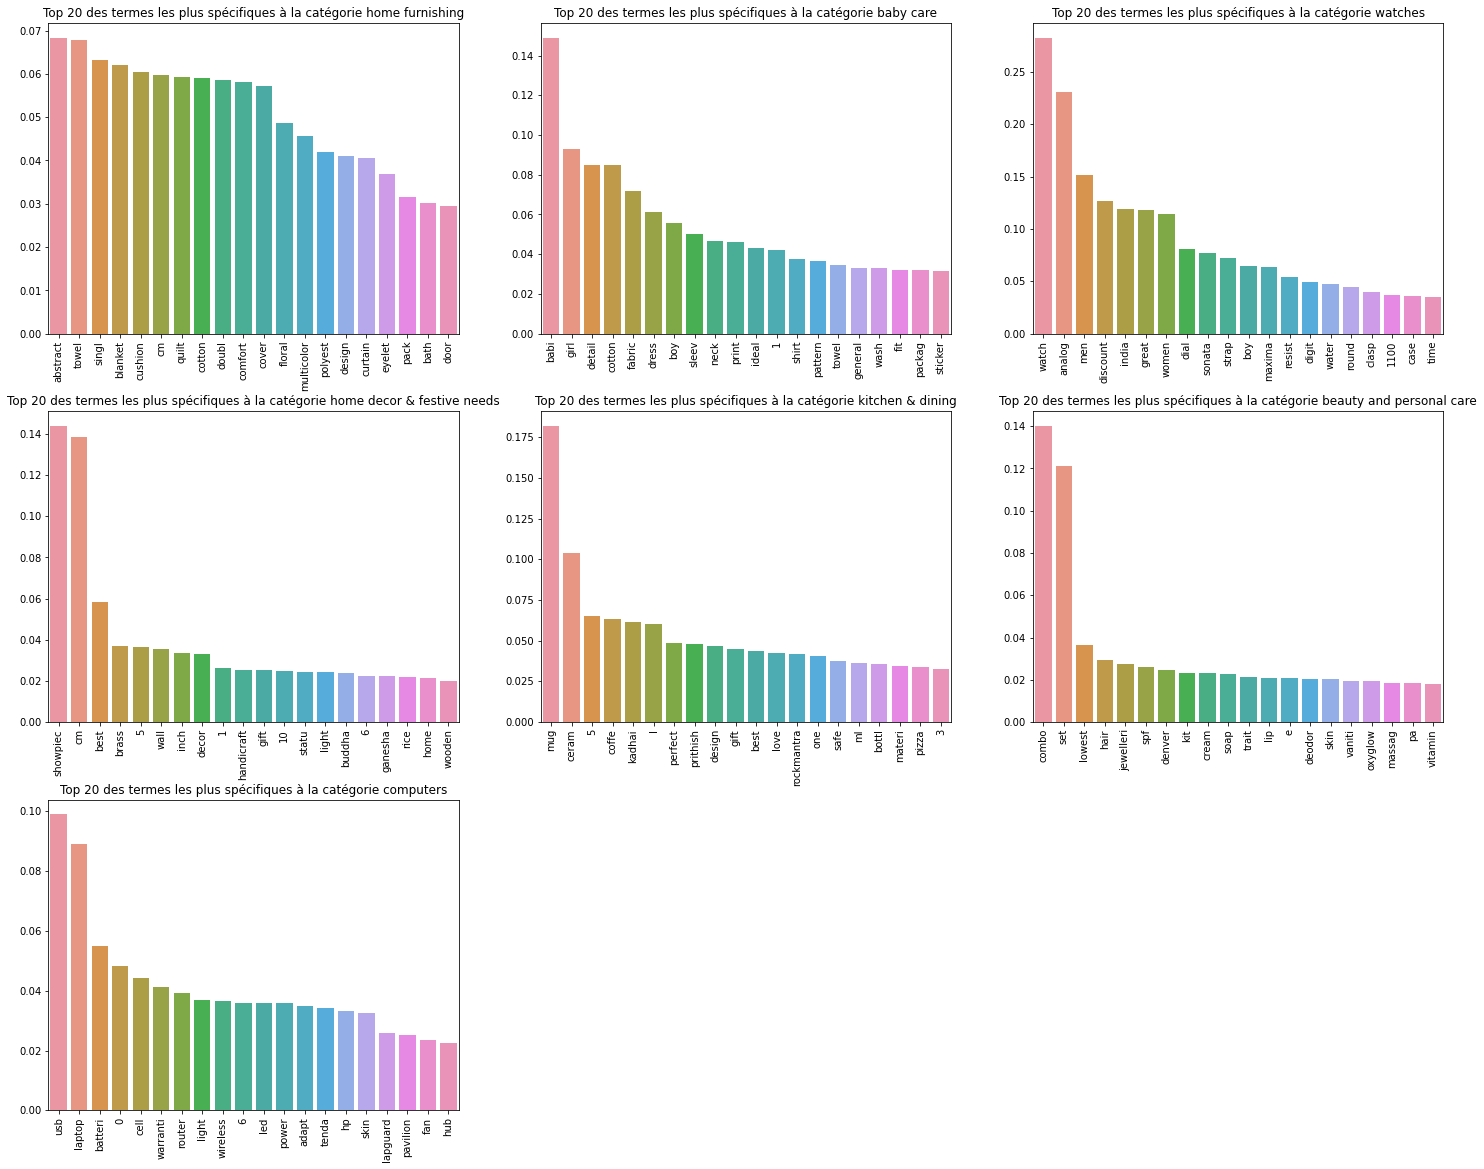

In [65]:
top(tf_idf_stem, 'tfidf')

# images

In [77]:
import cv2

descripteurs=[]
sift = cv2.SIFT_create()

for i in data.index:
    try:
        #lire image
        img = cv2.imread('Flipkart/Images/{}'.format(data.image[i]), 0) # 0 pour n/b
        img = cv2.equalizeHist(img) # egaliser histogram
        
        # descirpteurs
        keypoints, descriptor = sift.detectAndCompute(img,None)
    
        descripteurs.append(descriptor)
    except:
        print(i)

        
# try/except pour detecter sur quelle image il y a une erreur (erreur corrigée grace a egalisation d'histo, il y avait une image qui ne detectait pas de keypoints)

In [71]:
img = cv2.imread('Flipkart/Images/64d5d4a258243731dc7bbb1eef49ad74.jpg', 0)

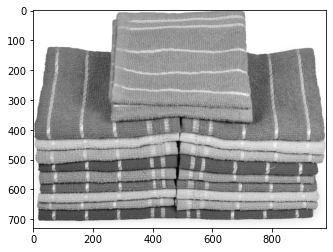

In [72]:
plt.imshow(img, cmap='gray')

In [73]:
img = cv2.equalizeHist(img)

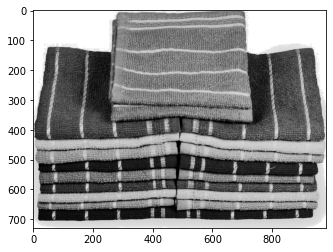

In [74]:
plt.imshow(img, cmap='gray')

In [75]:
keypoints, descriptor = sift.detectAndCompute(img,None)

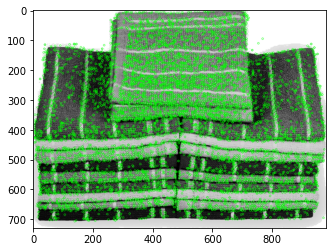

In [76]:
img_1 = cv2.drawKeypoints(img,keypoints,img, (0, 255, 0))
plt.imshow(img_1)

In [78]:
descripteurs_all = np.concatenate(descripteurs, axis=0)

In [80]:
descripteurs_all.shape

(9051349, 128)

In [55]:
k = int(np.sqrt(descripteurs_all.shape[0]))
#utilisation racine carré nb elements pour KMeans (aurait pu optimiser avec 10*categ)

In [59]:
from sklearn.cluster import MiniBatchKMeans

In [61]:
kmeans = MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(descripteurs_all)

MiniBatchKMeans(init_size=9024, n_clusters=3008, random_state=0)

In [63]:
kmeans.predict(descripteurs[0])

array([2639,   14,   11, ..., 1314, 2614, 2349])

In [65]:
len(kmeans.cluster_centers_)

3008

In [204]:
def build_hist(algo, desc):
    
    #creation histogramme par image comptant le nombre d'apparition des clusters
    
    clu = algo.predict(desc)
    histo = np.zeros(len(algo.cluster_centers_))
    for i in clu:
        histo[i] += 1
    return histo

In [205]:
histograms = []

for descripteur in descripteurs:
    hist = build_hist(kmeans, descripteur)
    histograms.append(hist)

In [206]:
histograms = np.asarray(histograms)

In [207]:
histograms.shape

(1050, 3008)

In [208]:
pca = PCA(n_components=0.99)

In [209]:
histograms_reduc = pca.fit_transform(histograms)

In [210]:
histograms_reduc.shape

(1050, 63)

In [223]:
tsne_img = TSNE(n_components=2, init='random', n_iter=2000)

img_tsne = reduction(tsne_img, histograms_reduc)

In [224]:
add_categ(img_tsne)

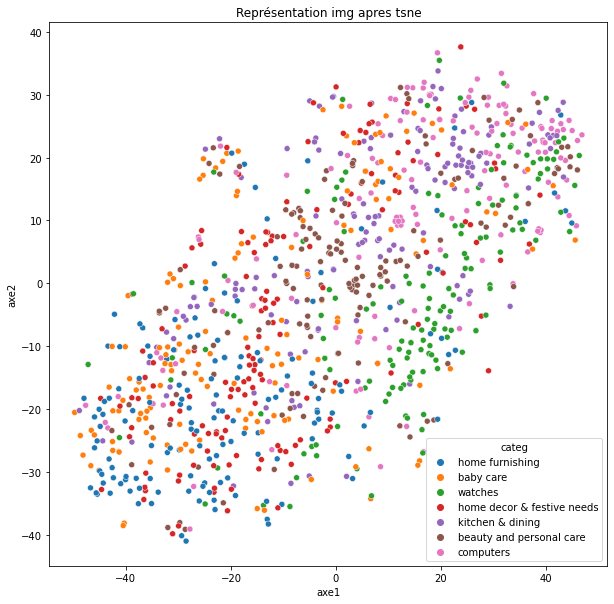

In [225]:
plot_reduc(img_tsne, 'img', 'tsne')

# Transfert Learning

In [66]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

images = []

for i in data.index:
    
    try:
 
        img = load_img('Flipkart/Images/{}'.format(data.image[i]), target_size=(224, 224))
        img = img_to_array(img)
        images.append(img)
        
    except:
        
        print(i)
    
images = np.asarray(images)
images = preprocess_input(images)

#pretraitement des images pour pouvoir les donner à vgg16

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:2911: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [81]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras import Model

# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model.output

# Ajouter la nouvelle couche fully-connected pour la classification
flat = Flatten()(x)
predictions = Dense(7, activation='softmax')(flat)

# Définir le nouveau modèle
feat_extract = Model(inputs=model.input, outputs=flat) #pour extraire features sans re-entrainer
new_model = Model(inputs=model.input, outputs=predictions)# pour entrainement partiel

In [225]:
feat_extract.compile()

In [226]:
feat_extract.summary()

Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [227]:
sortie = feat_extract.predict(images)

In [295]:
tsne = TSNE(init='pca', n_iter=2000)

In [233]:
test = tsne.fit_transform(sortie)

In [234]:
test = pd.DataFrame(test)

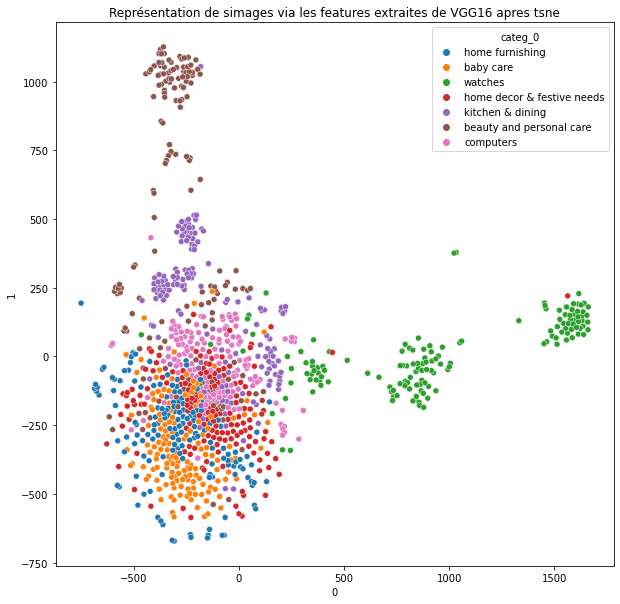

In [235]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=test[0], y=test[1], hue=data.categ_0)
plt.title('Représentation de simages via les features extraites de VGG16 apres tsne')
plt.show()

In [82]:
# Ne pas entraîner les 5 premières couches (les plus basses) 
for layer in new_model.layers[:5]:
   layer.trainable = False

In [83]:
from keras import optimizers
# Compiler le modèle 
new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [84]:
# X_train, X_test, y_train, y_test = train_test_split(images, pd.get_dummies(data.categ_0))

In [85]:
# Entraîner sur les données d'entraînement (X_train, y_train)
# new_model.fit(X_train, y_train, epochs=5)
#apres discussion avec mentor on entraine sur jeu de donnée entier comme tf_idf meme si separation permet d'eviter surrentrainement
# on est en faisabilité, ce serait l'etape suivante
new_model.fit(images, pd.get_dummies(data.categ_0), epochs=4)

Epoch 1/4
33/33 [==============================] - 194s 6s/step - loss: 3.1004 - accuracy: 0.3619
Epoch 2/4
33/33 [==============================] - 194s 6s/step - loss: 0.9631 - accuracy: 0.6676
Epoch 3/4
33/33 [==============================] - 193s 6s/step - loss: 0.5890 - accuracy: 0.8171
Epoch 4/4
33/33 [==============================] - 192s 6s/step - loss: 0.3058 - accuracy: 0.9095


In [162]:
# avec split
predict = new_model.predict(X_test)

In [149]:
# avec split
result = pd.DataFrame(predict, columns=pd.get_dummies(data.categ_0).columns).idxmax(axis=1)

In [150]:
#avec split
y_test.idxmax(axis=1)

1028                     Computers
1042                     Baby Care
410                      Computers
800                      Computers
592                      Baby Care
                   ...            
937     Home Decor & Festive Needs
99        Beauty and Personal Care
461               Kitchen & Dining
188               Kitchen & Dining
150               Kitchen & Dining
Length: 263, dtype: object

In [151]:
# avec split pour tester generalisation

from sklearn.metrics import accuracy_score

accuracy_score(y_test.idxmax(axis=1), result)

0.6083650190114068

In [238]:
new_model.summary()

Model: "functional_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [86]:
feature_output = new_model.layers[-2].output
feature_model = Model(inputs=new_model.input, outputs=feature_output)

#recupération des features apres entrainement partiel

In [87]:
feature_model.compile

<bound method Model.compile of <tensorflow.python.keras.engine.functional.Functional object at 0x0000027CC06257C0>>

In [88]:
sortie_trained = feature_model.predict(images)

In [89]:
reduc = tsne.fit_transform(sortie_trained)

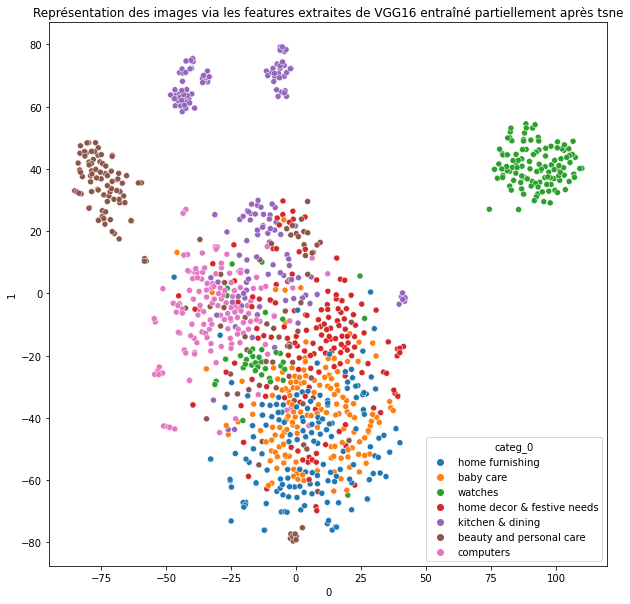

In [90]:
reduc = pd.DataFrame(reduc)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=reduc[0], y=reduc[1], hue=data.categ_0)
plt.title('Représentation des images via les features extraites de VGG16 entraîné partiellement après tsne')
plt.show()

In [130]:
clus.fit(reduc)

adjusted_rand_score(clus.labels_, data.categ_0)

0.34337083949248914

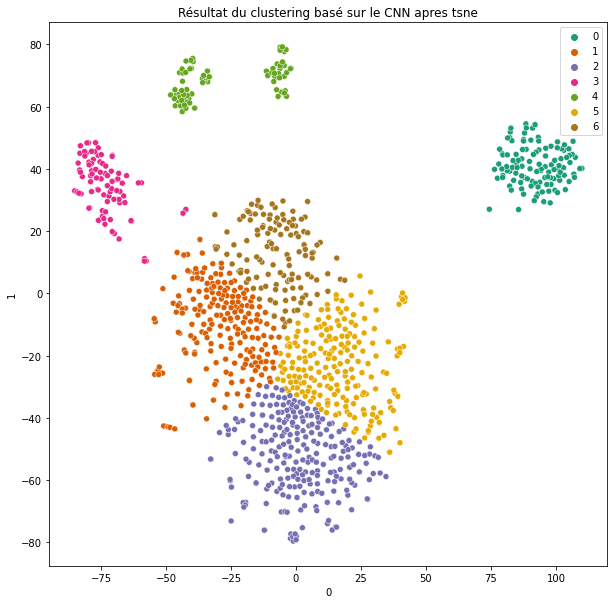

In [131]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=reduc[0], y=reduc[1], hue=clus.labels_, palette='Dark2')
plt.title('Résultat du clustering basé sur le CNN apres tsne')
plt.show()

# combinaison

In [97]:
clus.fit(reduc)

adjusted_rand_score(clus.labels_, data.categ_0)

0.34337083949248914

In [76]:
tf_idf_stem

,0,001,005,01,03,04,05tg,06,085,099,...,yet,york,young,youth,yuva,zero,zipper,zone,zyxel,categ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,home furnishing
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby care
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby care
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,home furnishing
4,0.162747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,home furnishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby care
1046,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby care
1047,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby care
1048,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby care


In [91]:
pd.DataFrame(sortie_trained)

,0,1,2,3,4,5,6,7,8,9,...,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.962633,0.00000,0.0,0.0,2.090400,3.306463,0.000000,0.0,1.743449,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.338899,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.888589,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.634826,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.085594,0.00000,0.0,0.0,7.304526,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.246691,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.437713,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,5.121873,0.0
1047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.093476,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.050868,0.0
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.439276,4.12951,0.0,0.0,0.000000,0.000000,0.002159,0.0,0.000000,0.0


In [92]:
test = pd.concat([tf_idf_stem.drop('categ', axis=1), pd.DataFrame(sortie_trained)], axis=1)

In [93]:
teest = tsne.fit_transform(test)

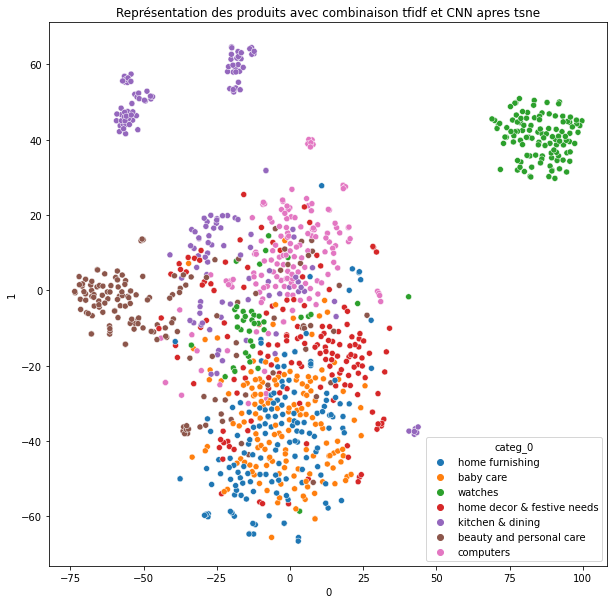

In [126]:
teest = pd.DataFrame(teest)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=teest[0], y=teest[1], hue=data.categ_0)
plt.title('Représentation des produits avec combinaison tfidf et CNN apres tsne')
plt.show()

In [98]:
clus.fit(teest)

adjusted_rand_score(clus.labels_, data.categ_0)

0.3350172250977962

In [99]:
X_train, X_test, y_train, y_test = train_test_split(test, data['categ_0'])

cls= KNeighborsClassifier()
cls.fit(X_train, y_train)

cls.score(X_test, y_test)

#test resultat classification

0.6425855513307985

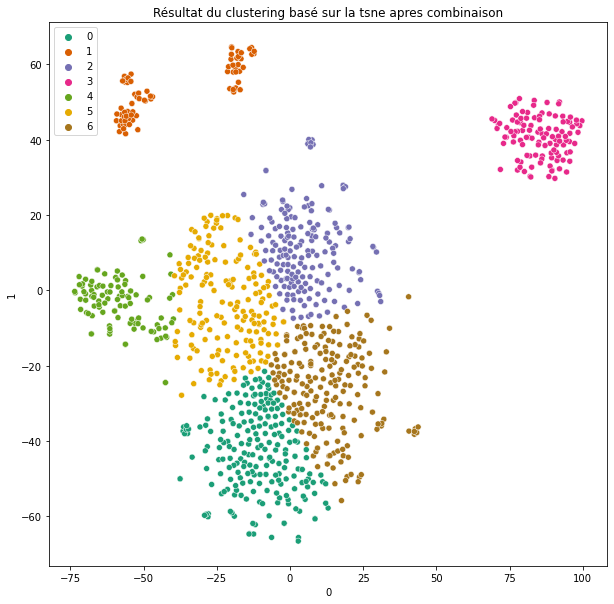

In [125]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=teest[0], y=teest[1], hue=clus.labels_, palette='Dark2')
plt.title('Résultat du clustering basé sur la tsne apres combinaison')
plt.show()